In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
hist_M = dict(np.load("toy1d_long_training/M/toy1d_train_history.npz"))
hist_S = dict(np.load("toy1d_long_training/S/toy1d_train_history.npz"))

epochs = list(range(1, 101, 1))


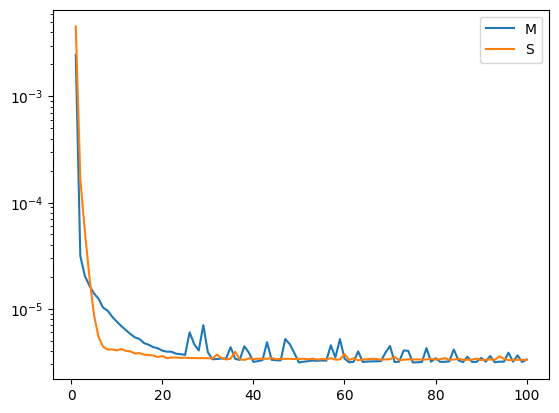

In [ ]:

plt.plot(epochs, hist_M["optimizer_loss_train"], label="M")
plt.plot(epochs, hist_S["optimizer_loss_train"], label="S")

plt.legend()

plt.yscale("log")

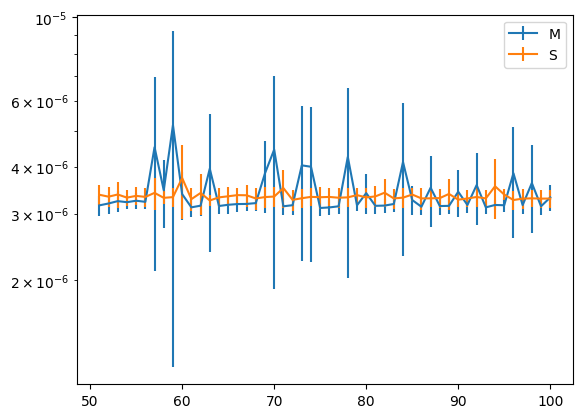

In [10]:

plt.errorbar(epochs[50:], hist_M["optimizer_loss_train"][50:], hist_M["optimizer_loss_train_std"][50:], label="M")
plt.errorbar(epochs[50:], hist_S["optimizer_loss_train"][50:], hist_S["optimizer_loss_train_std"][50:], label="S")

plt.legend()

plt.yscale("log")

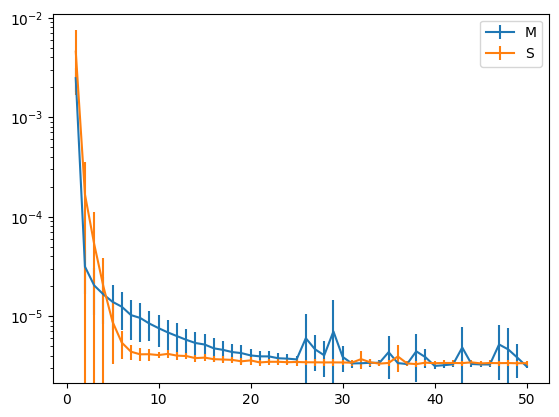

In [12]:
plt.errorbar(epochs[:50], hist_M["optimizer_loss_train"][:50], hist_M["optimizer_loss_train_std"][:50], label="M")
plt.errorbar(epochs[:50], hist_S["optimizer_loss_train"][:50], hist_S["optimizer_loss_train_std"][:50], label="S")

plt.legend()

plt.yscale("log")

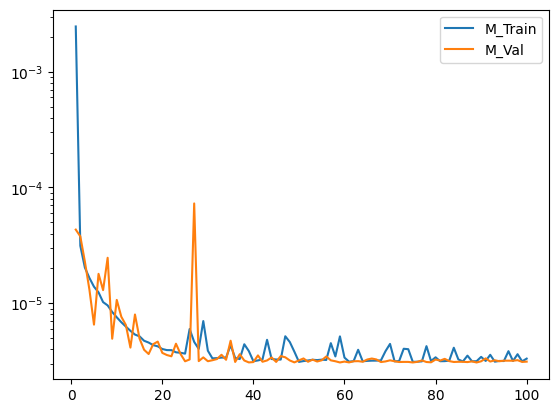

In [13]:

plt.plot(epochs, hist_M["optimizer_loss_train"], label="M_Train")
plt.plot(epochs, hist_M["optimizer_loss_val"], label="M_Val")

plt.legend()

plt.yscale("log")

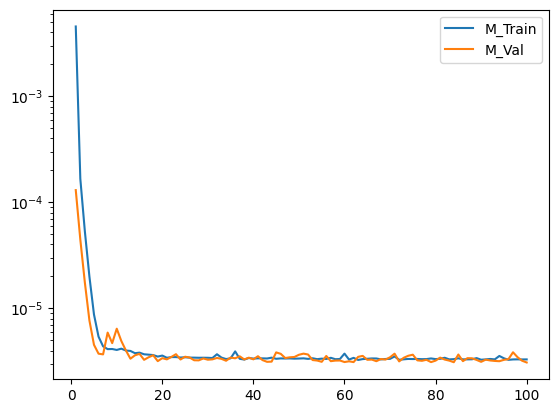

In [14]:

plt.plot(epochs, hist_S["optimizer_loss_train"], label="M_Train")
plt.plot(epochs, hist_S["optimizer_loss_val"], label="M_Val")

plt.legend()

plt.yscale("log")

In [15]:
from world_machine_experiments import toy1d, shared
from world_machine_experiments.toy1d import Dimensions
from world_machine_experiments.toy1d import base, multiple, parameter_variation
from world_machine import WorldMachine

from hamilton import driver
from hamilton_sdk import adapters
from torch.optim import Adam, AdamW
import torch

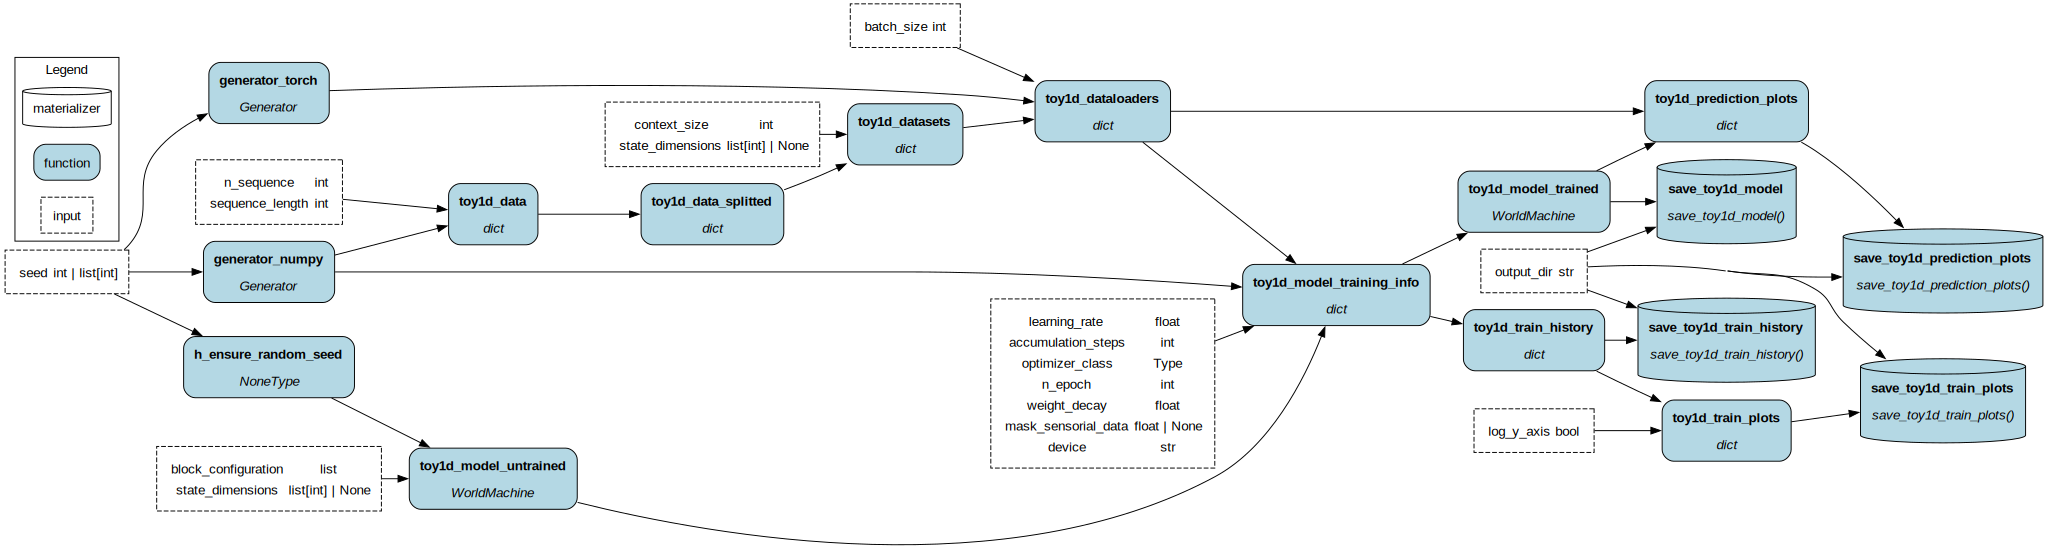

In [16]:
tracker = adapters.HamiltonTracker(
    project_id=1,
    username="EltonCN",
    dag_name="toy1d_base"
)

d = driver.Builder().with_modules(base, shared).with_adapter(tracker).build()

d.display_all_functions(deduplicate_inputs=True)

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

inputs = {"sequence_lenght": 1000,
                       "n_sequence": 10000,
                       "context_size": 200,
                       "state_dimensions": None,
                       "batch_size": 32,
                       "n_epoch": 1,
                       "learning_rate": 5e-3,
                       "weight_decay": 5e-4,
                       "accumulation_steps": 1,
                       "optimizer_class": AdamW,
                       "block_configuration": [Dimensions.NEXT_MEASUREMENT],
                       "device": device,
                       "seed":42
                       }

In [23]:
outputs = d.execute(["toy1d_dataloaders"], inputs=inputs)


Capturing execution run. Results can be found at http://localhost:8241/dashboard/project/1/runs/183


Captured execution run. Results can be found at http://localhost:8241/dashboard/project/1/runs/183



In [24]:
dataloaders = outputs["toy1d_dataloaders"]

In [22]:
model = torch.load("toy1d_long_training/M/run_0/toy1d_model.pt", weights_only=False)

In [25]:
item = next(iter(dataloaders["train"]))

inputs: torch.Tensor = item["inputs"].to(device)
targets: torch.Tensor = item["targets"]["state_decoded"]

with torch.no_grad():
    logits: torch.Tensor = model(
        inputs["state_decoded"], inputs)

logits = logits.cpu().numpy()

In [32]:
logits["state_decoded"][0][0], targets[0][0]

(array([0.11817431, 0.26409492, 0.5210362 ], dtype=float32),
 tensor([0.1129, 0.1129, 0.1127]))

In [ ]:
targets

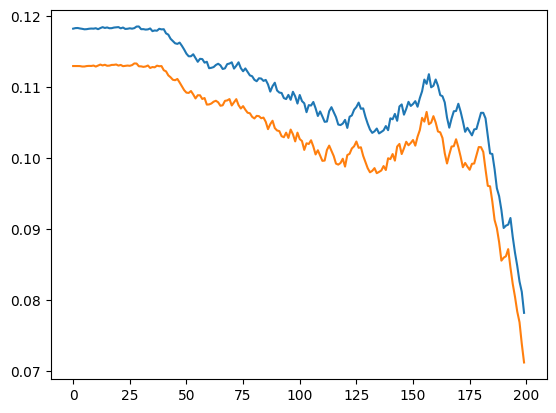

In [40]:
plt.plot(logits["state_decoded"][2][:,0])
plt.plot(targets[2][:,0])

# SSL

In [43]:
item = next(iter(dataloaders["train"]))

inputs: torch.Tensor = item["inputs"]
targets: torch.Tensor = item["targets"]["state_decoded"]

In [52]:
prev = inputs["state_decoded"][:, :, 0]
next = targets[:,:,0]

In [ ]:
prev[0]

tensor([0.1172, 0.1153, 0.1138, 0.1159, 0.1178, 0.1158, 0.1138, 0.1152, 0.1158,
        0.1137, 0.1136, 0.1130, 0.1149, 0.1135, 0.1125, 0.1113, 0.1135, 0.1163,
        0.1187, 0.1171, 0.1165, 0.1167, 0.1178, 0.1195, 0.1203, 0.1223, 0.1213,
        0.1197, 0.1186, 0.1176, 0.1195, 0.1194, 0.1174, 0.1161, 0.1177, 0.1142,
        0.1150, 0.1168, 0.1177, 0.1193, 0.1172, 0.1152, 0.1151, 0.1169, 0.1196,
        0.1173, 0.1149, 0.1128, 0.1122, 0.1106, 0.1089, 0.1100, 0.1095, 0.1082,
        0.1067, 0.1095, 0.1096, 0.1119, 0.1094, 0.1099, 0.1066, 0.1088, 0.1095,
        0.1109, 0.1134, 0.1164, 0.1150, 0.1139, 0.1159, 0.1143, 0.1144, 0.1113,
        0.1134, 0.1114, 0.1079, 0.1099, 0.1107, 0.1077, 0.1070, 0.1075, 0.1066,
        0.1047, 0.1044, 0.1028, 0.1034, 0.1029, 0.1007, 0.0974, 0.0965, 0.0976,
        0.0937, 0.0916, 0.0925, 0.0916, 0.0938, 0.0933, 0.0954, 0.0954, 0.0958,
        0.0946, 0.0954, 0.0936, 0.0906, 0.0875, 0.0879, 0.0860, 0.0829, 0.0839,
        0.0844, 0.0829, 0.0827, 0.0824, 

In [81]:
prev

tensor([[-0.2195, -0.2196, -0.2171,  ..., -0.4144, -0.4151, -0.4090],
        [ 0.0921,  0.0923,  0.0919,  ...,  0.2059,  0.2078,  0.2074],
        [ 0.1129,  0.1129,  0.1129,  ...,  0.1272,  0.1280,  0.1285],
        ...,
        [ 0.1129,  0.1129,  0.1129,  ...,  0.0848,  0.0862,  0.0856],
        [ 0.1129,  0.1129,  0.1129,  ...,  0.1111,  0.1096,  0.1083],
        [ 0.1129,  0.1129,  0.1129,  ...,  0.1545,  0.1553,  0.1550]])

In [91]:
torch.roll(prev, -1, 1)

tensor([[-0.2196, -0.2171, -0.2132,  ..., -0.4151, -0.4090, -0.2195],
        [ 0.0923,  0.0919,  0.0923,  ...,  0.2078,  0.2074,  0.0921],
        [ 0.1129,  0.1129,  0.1129,  ...,  0.1280,  0.1285,  0.1129],
        ...,
        [ 0.1129,  0.1129,  0.1129,  ...,  0.0862,  0.0856,  0.1129],
        [ 0.1129,  0.1129,  0.1129,  ...,  0.1096,  0.1083,  0.1129],
        [ 0.1129,  0.1129,  0.1129,  ...,  0.1553,  0.1550,  0.1129]])

In [82]:
next

tensor([[-0.2196, -0.2171, -0.2132,  ..., -0.4151, -0.4090, -0.4089],
        [ 0.0923,  0.0919,  0.0923,  ...,  0.2078,  0.2074,  0.2124],
        [ 0.1129,  0.1129,  0.1129,  ...,  0.1280,  0.1285,  0.1291],
        ...,
        [ 0.1129,  0.1129,  0.1129,  ...,  0.0862,  0.0856,  0.0850],
        [ 0.1129,  0.1129,  0.1129,  ...,  0.1096,  0.1083,  0.1100],
        [ 0.1129,  0.1129,  0.1129,  ...,  0.1553,  0.1550,  0.1556]])

In [94]:
torch.roll(prev, -1, 1)[0][0], next[0][0]

(tensor(-0.2196), tensor(-0.2196))

In [97]:
torch.roll(prev, -1, 1)[:,:-1]-next[:,:-1]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [118]:
device = "cpu"
with torch.no_grad():
    total_loss = torch.tensor(0, dtype=torch.float32)

    for item in dataloaders["train"]:
        inputs: torch.Tensor = item["inputs"]
        targets: torch.Tensor = item["targets"]

        prev = inputs["state_decoded"][:, :, 0]
        next = targets["state_decoded"][:,:,0]

        total_loss += mse(prev, next)

In [79]:
total_loss

tensor(0.0059)

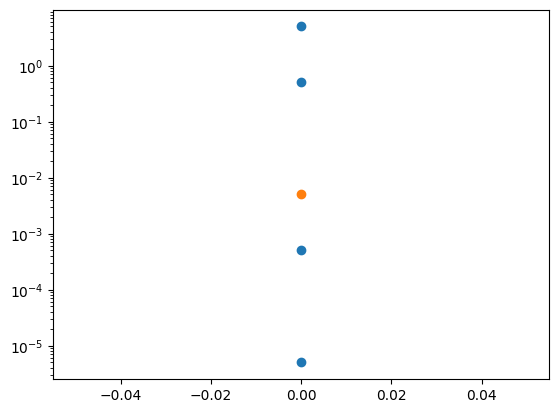

In [109]:
plt.plot(4*[0], [5, 5e-1, 5e-4, 5e-6], "o")
plt.plot(0, 5e-3, "o")

plt.yscale("log")